In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [3]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=0)
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_vals = silhouette_samples(iris_df, kmeans.labels_)
avg_score = np.mean(silhouette_vals)
print(avg_score)

0.5511916046195917


In [6]:
kmeans = KMeans(n_clusters=2, max_iter=300, random_state=0)
kmeans.fit(iris_df)
silhouette_vals = silhouette_samples(iris_df, kmeans.labels_)
avg_score = np.mean(silhouette_vals)
print(avg_score)

0.6810461692117462


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [9]:
scaler = StandardScaler()
X_std = scaler.fit_transform(iris.data)

In [11]:
clt = AgglomerativeClustering(linkage='single')
model = clt.fit(X_std)
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


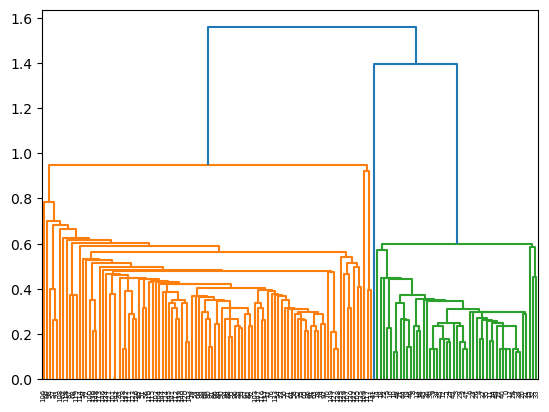

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram_plot = dendrogram(linkage(X_std, method='single'))
plt.show()

In [13]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris_df)

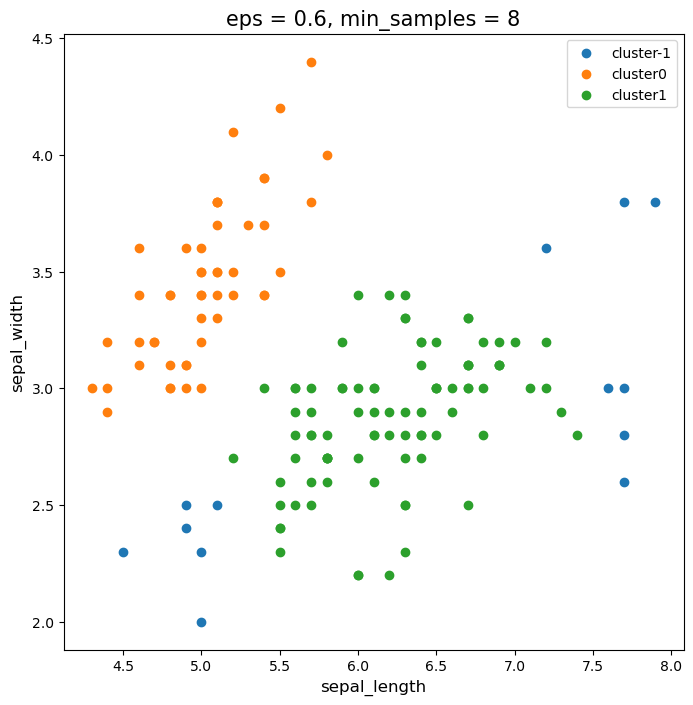

In [14]:
iris_df['cluster'] = dbscan_labels
plt.figure(figsize=(8, 8))

for i in range(-1, iris_df['cluster'].max() + 1):
    plt.scatter(iris_df.loc[iris_df['cluster'] == i, 'sepal_length'],
                iris_df.loc[iris_df['cluster'] == i, 'sepal_width'],
                label = 'cluster' + str(i))
plt.legend()
plt.title('eps = 0.6, min_samples = 8', size = 15)
plt.xlabel('sepal_length', size = 12)
plt.ylabel('sepal_width', size = 12)
plt.show()